In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

import track
import world
import lidar

In [2]:
all_cones = [[[0,0],'orange'],[[2,0],'orange'],
                   [[0,1],'blue'],[[2,1],'yellow'],
                   [[0,2],'blue'],[[2,2],'yellow'],
                   [[0,3],'blue'],[[2,3],'yellow'],
                   [[0,4],'blue'],[[2,4],'yellow'],
                   [[0,5],'blue'],[[2,5],'yellow'],

                   [[3+3*np.cos(5*np.pi/6),5+3*np.sin(5*np.pi/6)],'blue'],[[3+np.cos(5*np.pi/6),5+np.sin(5*np.pi/6)],'yellow'],
                   [[3+3*np.cos(4*np.pi/6),5+3*np.sin(4*np.pi/6)],'blue'],[[3+np.cos(4*np.pi/6),5+np.sin(4*np.pi/6)],'yellow'],
                   [[3+3*np.cos(3*np.pi/6),5+3*np.sin(3*np.pi/6)],'blue'],[[3+np.cos(3*np.pi/6),5+np.sin(3*np.pi/6)],'yellow'],
                   [[3+3*np.cos(2*np.pi/6),5+3*np.sin(2*np.pi/6)],'blue'],[[3+np.cos(2*np.pi/6),5+np.sin(2*np.pi/6)],'yellow'],
                   [[3+3*np.cos(1*np.pi/6),5+3*np.sin(1*np.pi/6)],'blue'],[[3+np.cos(1*np.pi/6),5+np.sin(1*np.pi/6)],'yellow'],
                   
                   [[6,0],'blue'],[[4,0],'yellow'],
                   [[6,1],'blue'],[[4,1],'yellow'],
                   [[6,2],'blue'],[[4,2],'yellow'],
                   [[6,3],'blue'],[[4,3],'yellow'],
                   [[6,4],'blue'],[[4,4],'yellow'],
                   [[6,5],'blue'],[[4,5],'yellow'],

                   [[3+3*np.cos(-1*np.pi/6),3*np.sin(-1*np.pi/6)],'blue'],[[3-np.cos(-1*np.pi/6),np.sin(-1*np.pi/6)],'yellow'],
                   [[3+3*np.cos(-2*np.pi/6),3*np.sin(-2*np.pi/6)],'blue'],[[3-np.cos(-2*np.pi/6),np.sin(-2*np.pi/6)],'yellow'],
                   [[3+3*np.cos(-3*np.pi/6),3*np.sin(-3*np.pi/6)],'blue'],[[3-np.cos(-3*np.pi/6),np.sin(-3*np.pi/6)],'yellow'],
                   [[3+3*np.cos(-4*np.pi/6),3*np.sin(-4*np.pi/6)],'blue'],[[3-np.cos(-4*np.pi/6),np.sin(-4*np.pi/6)],'yellow'],
                   [[3+3*np.cos(-5*np.pi/6),3*np.sin(-5*np.pi/6)],'blue'],[[3-np.cos(-5*np.pi/6),np.sin(-5*np.pi/6)],'yellow']]

earth = world.World("Earth")
test_track = track.Track(earth, 'Test Track', all_cones)
test_lidar = lidar.Lidar(pos=[1,0], yaw=np.deg2rad(90))

/Users/aidanprescott/Desktop/CAPSTONE/Simulation_git/2024_2025_av_sim_stack/simulation/physics/src/lidar.py:307: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


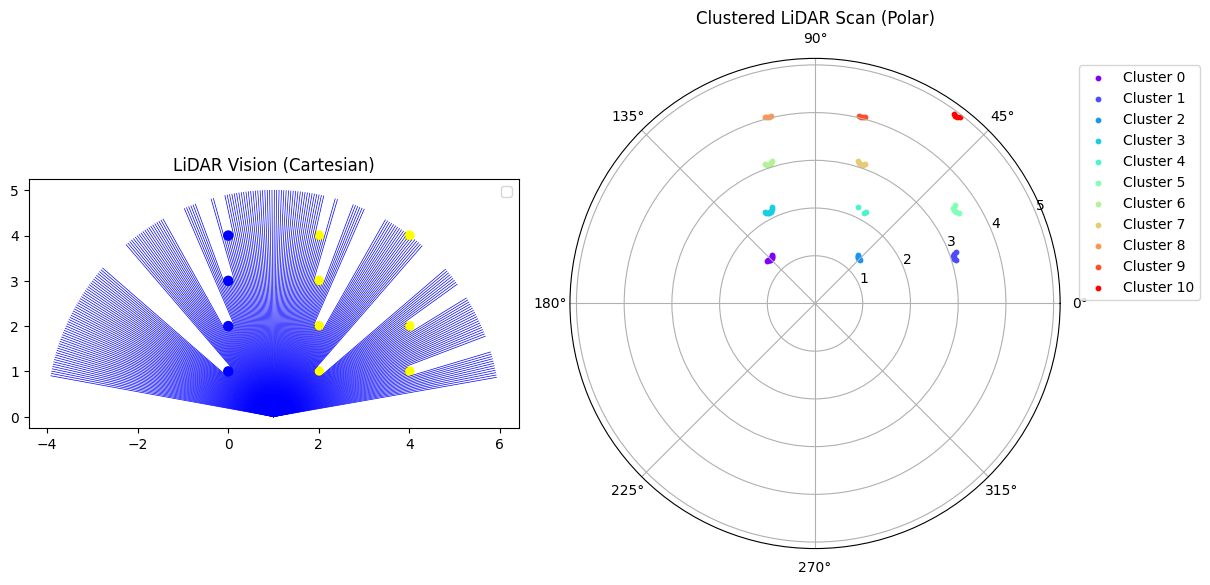

In [3]:
test_lidar.update(test_track)
test_lidar.plot_lidar()

In [ ]:
yellow_cones = [cone[0] for cone in all_cones if cone[1] == 'yellow']
blue_cones = [cone[0] for cone in all_cones if cone[1] == 'blue']
start_cones = [cone[0] for cone in all_cones if cone[1] == 'orange']

yellow_cones = np.array(yellow_cones)
blue_cones = np.array(blue_cones)
start_cones = np.array(start_cones)

start_point = [0.5*(start_cones[0][0]+start_cones[1][0]), 0.5*(start_cones[0][1]+start_cones[1][1])]
car = np.array(start_point)

car_range = 4

plt.scatter(yellow_cones[:, 0], yellow_cones[:, 1], c='yellow', label="Yellow Cones")
plt.scatter(blue_cones[:, 0], blue_cones[:, 1], c='blue', label="Blue Cones")
plt.scatter(start_cones[:, 0], start_cones[:, 1], c='orange', label="Start Cones")
plt.scatter(car[0], car[1], c='purple', marker='s', label="Car")
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

In [9]:
forward_cones = test_track.cones

In [14]:
cone_positions = np.array([cone.get_position() for cone in forward_cones])
cone_colors = np.array([cone.color for cone in forward_cones])

tri_vis = Delaunay(cone_positions)                                                  # Compute Delaunay Triangulation
simplices = tri_vis.simplices
triangle_colors = cone_colors[simplices]

mask = (
(np.any(triangle_colors == 'yellow', axis=1) & np.any(triangle_colors == 'blue', axis=1)) |
(np.sum(triangle_colors == 'orange', axis=1) == 2)
    )       

valid_triangles = simplices[mask]
print(valid_triangles)

[[23 43 22]
 [43 34 22]
 [24 23 22]
 [23 24 25]
 [11 12 10]
 [12 11 13]
 [30 31 28]
 [28 31 29]
 [31 30 32]
 [33 31 32]
 [ 3  2  1]
 [ 1  2  0]
 [ 2  3  5]
 [ 4  2  5]
 [ 8 11 10]
 [11  8  9]
 [15 12 13]
 [15 14 12]
 [14 15 16]
 [15 17 16]
 [20 21 32]
 [21 33 32]
 [26 28 29]
 [27 26 29]
 [26 27 25]
 [24 26 25]
 [43 41 34]
 [41 36 34]
 [36 41 38]
 [41 39 38]
 [39 37 38]
 [37 40 38]
 [17 19 16]
 [19 18 16]
 [19 21 20]
 [19 20 18]
 [ 6  4  5]
 [ 7  6  5]
 [ 8  6  9]
 [ 6  7  9]
 [42 35  0]
 [35  1  0]
 [37 35 40]
 [40 35 42]]


In [16]:
data = {
    'path': [],            # You can replace [] with your actual path data
    'path boundary': [],   # Replace [] with boundary data if available
    'valid edges': [],      # Replace [] with valid edges data
    'seen edges': []
}

for simplex in valid_triangles:
    for i in range(3):                                                              # Each triangle has 3 edges
        p1, p2 = sorted([simplex[i], simplex[(i + 1) % 3]])                         # Sort to avoid duplicate edges
        edge = (p1, p2)

        if edge in data['seen edges']:
            continue                                                                # Skip if already processed
        data['seen edges'].append(edge)

        cone1 = forward_cones[p1]
        cone2 = forward_cones[p2]

        color1 = cone1.color
        color2 = cone2.color

        if ('orange' not in [color1,color2]):
            
            if (color1 == color2):
                data['path boundary'].append((cone1, cone2))

            else:
                
                data['valid edges'].append((cone1, cone2))

                midpoint = (
                    (cone1.x + cone2.x) / 2.0,
                    (cone1.y + cone2.y) / 2.0
                )
                data['path'].append(midpoint)
                
        else:
            if (color1 == color2):
                data['valid edges'].append((cone1, cone2))

                midpoint = (
                    (cone1.x + cone2.x) / 2.0,
                    (cone1.y + cone2.y) / 2.0
                )
                data['path'].append(midpoint)
            
            else:
                dx = cone1.get_position()[0] - cone2.get_position()[0]
                dy = cone1.get_position()[1] - cone2.get_position()[1]

                if math.hypot(dx, dy) > 2:
                    data['valid edges'].append((cone1, cone2))

                    midpoint = (
                        (cone1.x + cone2.x) / 2.0,
                        (cone1.y + cone2.y) / 2.0
                    )
                    data['path'].append(midpoint)

                else:
                    data['path boundary'].append((cone1, cone2))


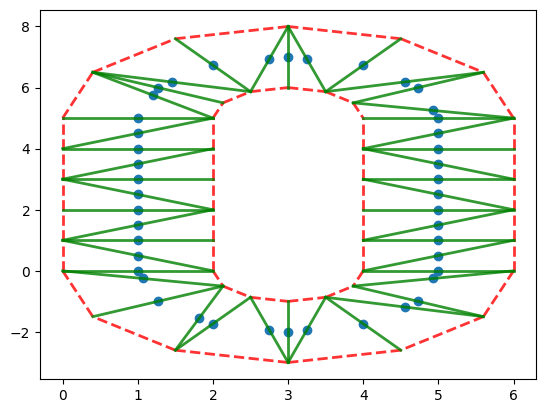

In [24]:
for cone1, cone2 in data['path boundary']:
    x_vals = [cone1.x, cone2.x]
    y_vals = [cone1.y, cone2.y]
    plt.plot(x_vals, y_vals, 'r--', linewidth=2, alpha=0.8, label='Path Boundary')

for cone1, cone2 in data['valid edges']:
    x_vals = [cone1.x, cone2.x]
    y_vals = [cone1.y, cone2.y]
    plt.plot(x_vals, y_vals, 'g-', linewidth=2, alpha=0.8, label='Valid Edge')

path = np.array(data['path'])
plt.scatter(path[:,0], path[:,1], label='Path')


In [22]:
print(data['path'])

[(4.93301270189222, -0.24999999999999997), (5.0, 0.0), (4.732050807568878, -0.9999999999999999), (5.0, 0.5), (5.0, 1.0), (1.200961894323342, 5.75), (1.0, 5.0), (1.2679491924311226, 6.0), (5.0, 4.0), (5.0, 3.5), (5.0, 3.0), (5.0, 4.5), (5.0, 5.0), (1.0, 1.0), (1.0, 0.5), (1.0, 0.0), (1.0, 1.5), (1.0, 2.0), (1.0, 4.5), (1.0, 4.0), (1.450961894323342, 6.18301270189222), (2.0000000000000004, 6.732050807568878), (2.75, 6.93301270189222), (3.0, 7.0), (4.732050807568878, 6.0), (4.93301270189222, 5.25), (5.0, 2.5), (5.0, 2.0), (5.0, 1.5), (4.549038105676658, -1.1830127018922192), (4.0, -1.7320508075688774), (3.25, -1.9330127018922194), (3.0, -2.0), (2.75, -1.9330127018922192), (2.0000000000000004, -1.7320508075688776), (3.25, 6.933012701892219), (4.0, 6.732050807568877), (4.549038105676658, 6.183012701892219), (1.0, 2.5), (1.0, 3.0), (1.0, 3.5), (1.2679491924311226, -0.9999999999999999), (1.0669872981077806, -0.24999999999999997), (1.8169872981077808, -1.5490381056766582)]


In [12]:
cone_positions = np.array([cone.get_position() for cone in forward_cones])
tri_vis = Delaunay(cone_positions)                                                  # Compute Delaunay Triangulation

valid_triangles = []

for simplex in tri_vis.simplices:                                                   # Filter out triangles that contains both a yellow and a blue cone
    colors = [forward_cones[i].color for i in simplex]
    if ('yellow' in colors and 'blue' in colors) or (colors.count('orange') == 2):
        valid_triangles.append(list(simplex))

print(valid_triangles)

[[23, 43, 22], [43, 34, 22], [24, 23, 22], [23, 24, 25], [11, 12, 10], [12, 11, 13], [30, 31, 28], [28, 31, 29], [31, 30, 32], [33, 31, 32], [3, 2, 1], [1, 2, 0], [2, 3, 5], [4, 2, 5], [8, 11, 10], [11, 8, 9], [15, 12, 13], [15, 14, 12], [14, 15, 16], [15, 17, 16], [20, 21, 32], [21, 33, 32], [26, 28, 29], [27, 26, 29], [26, 27, 25], [24, 26, 25], [43, 41, 34], [41, 36, 34], [36, 41, 38], [41, 39, 38], [39, 37, 38], [37, 40, 38], [17, 19, 16], [19, 18, 16], [19, 21, 20], [19, 20, 18], [6, 4, 5], [7, 6, 5], [8, 6, 9], [6, 7, 9], [42, 35, 0], [35, 1, 0], [37, 35, 40], [40, 35, 42]]


In [ ]:
# Distance from car to all cones
yellow_dists = np.linalg.norm(yellow_cones - car, axis=1)
blue_dists = np.linalg.norm(blue_cones - car, axis=1)
start_dists = np.linalg.norm(start_cones - car, axis=1)

# Boolean masks for filtering
yellow_mask = (yellow_dists <= car_range) & (yellow_cones[:, 1] >= car[1])
blue_mask = (blue_dists <= car_range) & (blue_cones[:, 1] >= car[1])
start_mask = (start_dists <= car_range) & (start_cones[:, 1] >= car[1])

# Apply masks
visible_yellow_cones = yellow_cones[yellow_mask]
visible_blue_cones = blue_cones[blue_mask]
visible_start_cones = start_cones[start_mask]

visible_cones = np.vstack([visible_yellow_cones, visible_blue_cones, visible_start_cones])

print(visible_cones)

# Step 2: Compute Delaunay Triangulation
tri_vis = Delaunay(visible_cones)

# Step 3: Filter triangles that contain both a yellow and a blue cone
valid_triangles = []
for simplex in tri_vis.simplices:
    triangle = visible_cones[simplex]
    
    is_yellow = np.array([np.any(np.all(pt == visible_yellow_cones, axis=1)) for pt in triangle])
    is_blue = np.array([np.any(np.all(pt == visible_blue_cones, axis=1)) for pt in triangle])
    
    if np.any(is_yellow) and np.any(is_blue):
        valid_triangles.append(simplex)

valid_triangles = np.array(valid_triangles)

# Step 4: Extract valid and invalid edges
valid_edges = []
invalid_edges = []
midpoints = []
seen_edges = set()

for simplex in valid_triangles:
    for i in range(3):
        idx1, idx2 = sorted([simplex[i], simplex[(i + 1) % 3]])
        edge = (idx1, idx2)

        if edge in seen_edges:
            continue
        seen_edges.add(edge)

        pt1 = visible_cones[idx1]
        pt2 = visible_cones[idx2]

        pt1_yellow = np.any(np.all(pt1 == visible_yellow_cones, axis=1))
        pt2_yellow = np.any(np.all(pt2 == visible_yellow_cones, axis=1))
        pt1_blue = np.any(np.all(pt1 == visible_blue_cones, axis=1))
        pt2_blue = np.any(np.all(pt2 == visible_blue_cones, axis=1))

        if (pt1_yellow and pt2_yellow) or (pt1_blue and pt2_blue):
            print(f'Invalid: {pt1_yellow} and {pt2_yellow} and {pt1_blue} and {pt2_blue} at {pt1} to {pt2}')
            invalid_edges.append((pt1, pt2))
        else:
            print(f'Valid: {pt1_yellow} and {pt2_yellow} and {pt1_blue} and {pt2_blue} at {pt1} to {pt2}')
            valid_edges.append((idx1, idx2))
            midpoints.append((pt1 + pt2) / 2.0)

midpoints = np.array(midpoints)

# Step 5: Plot everything
plt.figure(figsize=(8, 8))
plt.scatter(visible_yellow_cones[:, 0], visible_yellow_cones[:, 1], c='yellow', marker='o', label="Yellow Cones")
plt.scatter(visible_blue_cones[:, 0], visible_blue_cones[:, 1], c='blue', marker='o', label="Blue Cones")
plt.scatter(visible_start_cones[:, 0], visible_start_cones[:, 1], c='orange', marker='o', label="Start Cones")
plt.scatter(car[0], car[1], c='purple', marker='s', label="Car")

if len(midpoints) > 0:
    plt.scatter(midpoints[:, 0], midpoints[:, 1], c='green', marker='x', label="Midpoints")

# Draw all triangle edges
for simplex in valid_triangles:
    for i in range(3):
        p1 = visible_cones[simplex[i]]
        p2 = visible_cones[simplex[(i + 1) % 3]]
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], c="black", linewidth=0.5)

# Draw invalid edges
for pt1, pt2 in invalid_edges:
    plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r--', linewidth=1.2)

plt.legend()
plt.gca().set_aspect('equal')
plt.grid(True)
plt.title("Delaunay Triangles & Valid Midpoints")
#plt.xlim(-3, 6)
#plt.ylim(-2, 7)
plt.show()

In [ ]:
# My attempt at Kinematic Model

class Car3:

    def __init__(self, x=0.0, y=0.0, yaw=0.0, v=0.0, delta=0.0):
        self.lf = 1
        self.lr = 1.9

        self.x = x
        self.y = y
        self.yaw = yaw
        self.v = v
        self.delta = delta


def update3(state, a, delta_dot):

    if state.delta >= max_steer:
        state.delta = max_steer
    if state.delta <= - max_steer:
        state.delta = - max_steer
    
    beta = np.arctan((np.tan(state.delta) * state.lr) / (state.lr + state.lf) )

    state.x = state.x + state.v * math.cos(state.yaw + beta) * dt
    state.y = state.y + state.v * math.sin(state.yaw + beta) * dt
    state.yaw = state.yaw + (state.v / state.lr) * math.sin(beta) * dt
    state.v = state.v + a * dt
    state.delta = state.delta + delta_dot * dt

    return state

In [ ]:
# Very basic kinematic bicycle model

class Car2:

    def __init__(self, x=0.0, y=0.0, yaw=0.0, v=0.0, delta=0.0):
        self.x = x
        self.y = y
        self.yaw = yaw
        self.v = v
        self.delta = delta


def update2(state, a, delta_dot):

    if state.delta >= max_steer:
        state.delta = max_steer
    if state.delta <= - max_steer:
        state.delta = - max_steer

    state.x = state.x + state.v * math.cos(state.yaw) * dt
    state.y = state.y + state.v * math.sin(state.yaw) * dt
    state.yaw = state.yaw + state.v / L * math.tan(state.delta) * dt
    state.v = state.v + a * dt
    state.delta = state.delta + delta_dot*dt

    return state

In [ ]:
# My attempt at Dynamic Bicycle with Linear tyre model

max_steer = np.deg2rad(45.0)
dt = 0.1
L = 0.5


class Car1:

    def __init__(self, x=0.0, y=0.0, yaw=0.0, u=0.0, v=0.0, yaw_dot=0.0):
        self.mass = 1420
        self.kf = -130000
        self.kr = -86000
        self.lf = 1
        self.lr = 1.9
        self.Iz = 1500

        self.x = x
        self.y = y
        self.yaw = yaw
        self.u = u
        self.v = v
        self.yaw_dot = yaw_dot


def update1(state, a, delta):

    if delta >= max_steer:
        delta = max_steer
    if delta <= - max_steer:
        delta = - max_steer

    state.x = state.x + (state.u * math.cos(state.yaw) - state.v * math.sin(state.yaw)) * dt
    state.y = state.y + (state.v * math.cos(state.yaw) + state.u * math.sin(state.yaw)) * dt
    state.yaw = state.yaw + state.yaw_dot * dt
    state.u = state.u + a * dt
    state.v = (state.mass * state.u * state.v + (state.lf * state.kf - state.lr * state.kr) * state.yaw_dot * dt - state.kf * delta * state.u * dt - state.mass * state.u * state.u * state.yaw_dot * dt) / (
        state.mass * state.u - (state.kf + state.kr) * dt)

    state.yaw_dot = (state.Iz * state.u * state.yaw_dot + (state.lf * state.kf - state.lr * state.kr) * state.v * dt - state.lf * state.kf * delta * state.u * dt) / (
        state.Iz * state.u - (state.lf * state.lf * state.kf - state.lr * state.lr * state.kr) * dt)
    return state